# Sentiment Analysis Project Overview
##### Author - Aryan Singla , UIET KUK(ECE)

## Introduction
In this project, we'll be exploring sentiment analysis, a natural language processing (NLP) technique that involves extracting subjective information from text data. Sentiment analysis aims to determine the sentiment expressed in a piece of text, whether it's positive, negative, or neutral.

## Goals
The primary goals of this project are:
- To analyze the sentiment of text data using machine learning and deep learning techniques.
- To build a sentiment analysis model that can accurately classify the sentiment of text.

## Dataset
We will be using a balanced [dataset](link_to_dataset) containing text data along with their corresponding sentiment labels. The dataset consists of 2 columns:[clean_text : which represent the tweet] and [category : 0 for positive sentiment and 1 for negative sentiment].

## Methodology
Our approach to sentiment analysis will involve the following steps:
1. Data Preprocessing: Cleaning and preparing the text data for analysis.
2. Feature Extraction: Transforming the text data into numerical representations suitable for machine learning models.
3. Model Building: Training machine learning or deep learning models to classify sentiment.
4. Evaluation: Assessing the performance of the models using appropriate metrics.

## Tools and Libraries
We'll be using the following tools and libraries for this project:
- Python programming language
- Jupyter Notebook for interactive development
- Scikit-learn, TensorFlow, or PyTorch for machine learning and deep learning
- Pandas and NumPy for data manipulation
- Matplotlib and Seaborn for data visualization

## Conclusion
By the end of this project, we aim to develop a robust sentiment analysis model that can accurately classify the sentiment of text data, which can be applied to various real-world scenarios.

Stay tuned as we dive into each step of the project in detail!


# Loading the Dataset

In [1]:
# We are using a balanced dataset which contains equal values of category of sentiments.
import pandas as pd
data = pd.read_csv("tweets_data.csv")

In [2]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [4]:
# checking for missing values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [5]:
# as there are no missing value let's just drop the id column
data.drop(['id'], axis=1, inplace=True)

<AxesSubplot:>

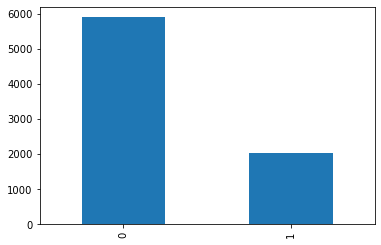

In [6]:
data['label'].value_counts().plot(kind='bar')

# Data Cleaning

In this project, I focused on cleaning the text data, which was rich in mentions, hashtags, hyperlinks, and various other artifacts commonly found in social media content. To accomplish this, I employed a combination of techniques and libraries to ensure the data was ready for further analysis.

#### 1. Regex:

The `re` library, Python's regular expression module, played a vital role in cleaning the text data. It was utilized for the following tasks:

- **Removing Mentions**: Twitter mentions (e.g., "@username") were eliminated using the regular expression `@[A-Za-z0-9_]+`.
- **Removing Hashtags**: Hashtags (e.g., "#topic") were stripped away using the regular expression `#`.
- **Removing Hyperlinks**: URLs and hyperlinks were scrubbed out using the regular expression `http\S+|www\S+`.

#### 2. Lemmatization:

Lemmatization is a process of reducing words to their base or root form, which helps in standardizing text data for analysis. For this task, I utilized the WordNet lemmatizer from the `nltk` library. Lemmatization ensures that different inflected forms of a word are treated as a single item, enhancing the consistency of the text data.

#### 3. Stopwords Removal:

Stopwords are common words that do not carry significant meaning in text analysis and are often removed to improve the quality of text data. I used the `stopwords` corpus from the `nltk` library to identify and remove stopwords from the text. This step helps in reducing noise and focusing on the essential content of the text data.

#### 4. Contractions Expansion:

Contractions are shortened versions of words or phrases (e.g., "don't" for "do not") commonly used in informal writing, such as social media posts. Expanding contractions helps in standardizing the text and ensures that each word is treated independently. I utilized the `contractions` library to expand contractions in the text data before further processing.

In [7]:
data['tweet'][234]

'Just bought something kahapon :) #walkman #Sony xempre with ORANGE headset haha!'

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions

In [9]:
def clean_tweet(tweet):
    # Remove mentions
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#', '', tweet)
    # Remove hyperlinks
    tweet = re.sub(r'http\S+|www\S+', '', tweet)
    # Expand contractions
    tweet = contractions.fix(tweet)
    # Remove special characters and keep only alphabets and numbers
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    # Tokenize the tweet
    tokens = word_tokenize(tweet)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back into a string
    clean_tweet = ' '.join(lemmatized_tokens)
    return clean_tweet

In [10]:
cleaned_tweets = []  # list of cleaned tweets
for tweet in data['tweet']:
    cleaned_tweets.append(clean_tweet(tweet))

In [11]:
data['cleaned_tweet'] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,0,We love this! Would you go? #talk #makememorie...,love would go talk makememories unplug relax i...
3,0,I'm wired I know I'm George I was made that wa...,wired know george made way iphone cute daventr...
4,1,What amazing service! Apple won't even talk to...,amazing service apple even talk question unles...


In [12]:
data['cleaned_tweet'][234]

'bought something kahapon walkman sony xempre orange headset haha'

 # Data Visualization
 
 #### We visualized the top 25 words from the cleaned_tweets

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

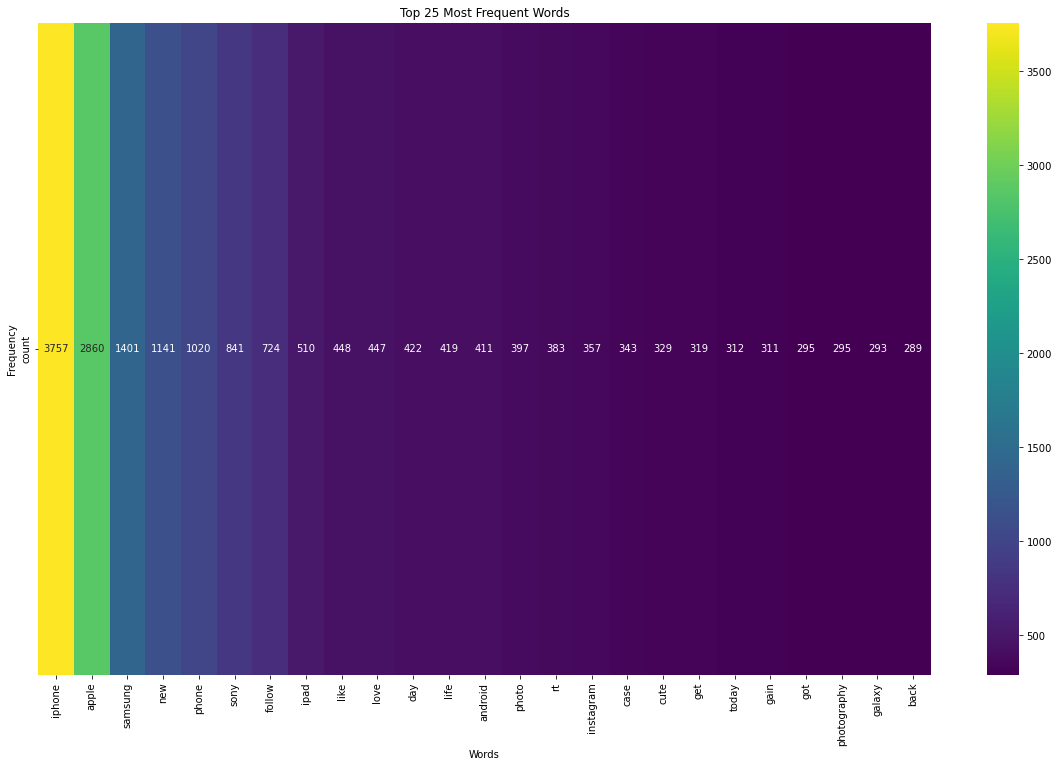

In [14]:
# Tokenize the cleaned tweets into words
tokenized_tweets = [tweet.split() for tweet in data['cleaned_tweet']]
# Flatten the list of tokenized tweets into a single list of words
all_words = [word for tweet_words in tokenized_tweets for word in tweet_words]
# Count the occurrences of each word
word_counts = Counter(all_words)
# Convert the word counts to a dictionary
word_counts_dict = dict(word_counts)
# Create a DataFrame from the word counts dictionary
word_counts_df = pd.DataFrame.from_dict(word_counts_dict, orient='index', columns=['count'])
# Sort the DataFrame by word counts in descending order
word_counts_df = word_counts_df.sort_values(by='count', ascending=False)
# Take the top 20 most frequent words
top_words = word_counts_df.head(25)
# Create a word heatmap using seaborn
plt.figure(figsize=(20, 12))
sns.heatmap(top_words.transpose(), cmap='viridis', annot=True, fmt="d")
plt.title('Top 25 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [15]:
data.head()

,label,tweet,cleaned_tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,0,We love this! Would you go? #talk #makememorie...,love would go talk makememories unplug relax i...
3,0,I'm wired I know I'm George I was made that wa...,wired know george made way iphone cute daventr...
4,1,What amazing service! Apple won't even talk to...,amazing service apple even talk question unles...


# Creating a Bag of Words Model using 
#### Count Vectorizer :

- CountVectorizer is a text preprocessing technique used in natural language processing (NLP) to convert a collection of text documents into a matrix of token counts. It's part of the feature extraction process and is particularly useful for preparing text data for machine learning algorithms.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()

In [17]:
CV_data = CV.fit_transform(data['cleaned_tweet'])

In [18]:
CV_data[0]

<1x16466 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [19]:
df = data.copy()
df.columns = ['label', 'tweet', 'cleaned_tweets']
df.to_pickle('cleaned_tweets.pkl')
df.to_csv('cleaned_tweets', index=False)

In [20]:
df = pd.DataFrame(CV_data.todense() )
df 

,0,1,2,3,4,5,6,7,8,9,...,16456,16457,16458,16459,16460,16461,16462,16463,16464,16465
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Logistic Regression Model

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_data, data['label'], test_size=0.33, stratify=data['label'], random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))  # train score)
print(lr.score(X_test, y_test))   # test score)  

0.9779494911421033
0.8775822494261668


Here, the difference between the train and test accuracy is 10% that is why we won't use it because it is overfitting so we will use 

In [23]:
from sklearn.metrics import classification_report
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test , y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1945
           1       0.78      0.72      0.75       669

    accuracy                           0.88      2614
   macro avg       0.84      0.83      0.83      2614
weighted avg       0.88      0.88      0.88      2614



In [24]:
# l1 Regulaziation
lr1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.9)
lr1.fit(X_train, y_train)

print(lr1.score(X_train, y_train))  # train score)
print(lr1.score(X_test, y_test))   # test score)     


0.9206558612891067
0.8668706962509564


In [25]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
import numpy as np
X = CV_data
y = data['label']


LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.9)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

results

print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

[0.87941919 0.86868687 0.86300505 0.87373737 0.87941919]
87.29 0.63
[0.92266414 0.91950758 0.921875   0.91934975 0.91871843]
92.04 0.16
[0.87941919 0.86868687 0.86300505 0.87373737 0.87941919]
87.29 0.63


In [26]:
## Hyper parameter tuning of the LR1 model
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)


grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'C': 0.90001}, 0.8727272727272727, 18)

# Creating a Bag of Words Model using 
#### TF-IDF Vectorizer :

- TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer is a text preprocessing technique used in natural language processing (NLP) to convert a collection of text documents into numerical vectors. It's a popular method for feature extraction and is particularly useful for preparing text data for machine learning algorithms.


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
X = data['cleaned_tweet']
y = data['label']
stop_words = set(stopwords.words('english'))
TFIDF = TfidfVectorizer(stop_words=stop_words, min_df = 4, max_features=1200)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  # no. of features AFTER applying the stopwords

86.39 0.31
84.86 1.24


1200

# Creating a Gensim:Word2Vec Model

In [28]:
from gensim.models import Word2Vec
tweets_list = list(data['cleaned_tweet'].apply(lambda x: x.split()))
cbow_model = Word2Vec(tweets_list, vector_size = 300, window = 3, min_count=5, sg=0)

In [29]:
def document_vector(doc):
    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]
    
    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(cbow_model.wv.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean


In [30]:
tweets_temp = data['cleaned_tweet'].apply(document_vector)

C:\Users\pk\AppData\Local\Temp\ipykernel_10340\556270802.py:9: RuntimeWarning: Mean of empty slice.
  wv1_mean = wv1_.mean(axis=0)


In [31]:
tweets_temp[:5]  # displaying the 1st 5 tweets, as document vectors

0    [-0.090080164, 0.26460126, 0.00423076, 0.13398...
1    [-0.0651898, 0.30592477, 0.0030073028, 0.16666...
2    [-0.055297602, 0.2319622, 0.008258364, 0.13600...
3    [-0.06455055, 0.25265494, 0.004988278, 0.14575...
4    [-0.0550977, 0.24189469, 0.013624817, 0.131247...
Name: cleaned_tweet, dtype: object

In [32]:
embedding_size = 300
tweets_vec = np.ones((len(tweets_temp), embedding_size))*np.nan
for i in range(tweets_vec.shape[0]):
    tweets_vec[i,:] = tweets_temp.iloc[i]

tweets_vec.shape # this itself is your final FEATURE MATRIX

(7920, 300)

In [33]:
df = pd.DataFrame(tweets_vec)
df['y'] = data['label']
df.dropna(how='any', axis=0, inplace=True)

In [34]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,y
0,-0.090080,0.264601,0.004231,0.133989,-0.003309,-0.179349,0.182376,0.440369,0.052682,-0.116478,...,0.293237,0.198126,-0.001843,0.198578,0.349544,0.004741,-0.155976,0.217552,-0.057659,0
1,-0.065190,0.305925,0.003007,0.166667,0.035368,-0.237854,0.168166,0.519967,0.059122,-0.105917,...,0.318003,0.218326,-0.023073,0.274363,0.376964,0.039559,-0.179082,0.198297,-0.075063,0
2,-0.055298,0.231962,0.008258,0.136007,0.041670,-0.185313,0.158934,0.431419,0.060651,-0.089533,...,0.270727,0.170816,-0.003909,0.242761,0.312438,0.033804,-0.143584,0.170391,-0.059607,0
3,-0.064551,0.252655,0.004988,0.145752,0.036318,-0.195926,0.174303,0.469532,0.058989,-0.105710,...,0.299197,0.193784,-0.003212,0.264250,0.346821,0.027196,-0.157774,0.188071,-0.064435,0
4,-0.055098,0.241895,0.013625,0.131248,0.039060,-0.177072,0.139184,0.409705,0.060122,-0.085989,...,0.253893,0.164147,-0.016239,0.217001,0.289334,0.034760,-0.136129,0.162804,-0.051740,1


In [35]:
X_word_emb = df.drop('y', axis=1)
y = df['y']
X_word_emb.shape

(7919, 300)

In [36]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

In [37]:

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4, random_state=42)
WE_pipe = Pipeline([('SC', StandardScaler()), ('LR', LR1)] )

results = cross_validate(WE_pipe, X_word_emb, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 


84.48 0.23
84.0 0.96


In [38]:
X = data['cleaned_tweet']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 300 FEATURES ONLY to build the model
CV = CountVectorizer(min_df=5, max_features=300)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

86.55 0.35
85.45 1.2


300

# Deep Learning Model 

In [39]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
import pydot
import keras.backend as K

In [47]:
# This user-defined function return a Deep Learning Model

def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(64, input_shape=(n_words,), activation='relu', kernel_regularizer='l2'))
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], )
    model.summary()    
    return model

In [41]:
# evaluate a neural network model
def evaluate_model(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 5
    n_words = Xtest.shape[1]
    
    for i in range(n_repeats):
        # define network
        model = define_model(n_words)
        
        # fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=0)
        
        # evaluate
        _, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

In [42]:
# fit a tokenizer
from keras.preprocessing.text import Tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer() # num_words=1000
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [43]:
# create the tokenizer
train_docs = data['cleaned_tweet']
tokenizer = create_tokenizer(train_docs)

In [44]:
# encode data
X = tokenizer.texts_to_matrix(train_docs, mode='binary')

In [45]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,  test_size=0.2,random_state=42) 

In [48]:
# define network
K.clear_session() 
n_words = Xtrain.shape[1]
model = define_model(n_words)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1055936   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,058,049
Trainable params: 1,058,049
Non-trainable params: 0
_________________________________________________________________


In [49]:
# fit network
checkpoint = ModelCheckpoint("BestModel.h5",
                             monitor="val_loss", 
                             mode="min",
                             save_best_only = True,
                             verbose=1)
callbacks = [checkpoint]

h = model.fit(Xtrain, ytrain, validation_split=0.1, callbacks = callbacks, batch_size=180, epochs=25, verbose=2)

Epoch 1/25

Epoch 1: val_loss improved from inf to 0.82975, saving model to BestModel.h5
32/32 - 2s - loss: 1.2176 - accuracy: 0.7408 - val_loss: 0.8298 - val_accuracy: 0.7776 - 2s/epoch - 63ms/step
Epoch 2/25

Epoch 2: val_loss improved from 0.82975 to 0.63414, saving model to BestModel.h5
32/32 - 1s - loss: 0.7211 - accuracy: 0.8264 - val_loss: 0.6341 - val_accuracy: 0.8644 - 554ms/epoch - 17ms/step
Epoch 3/25

Epoch 3: val_loss improved from 0.63414 to 0.54019, saving model to BestModel.h5
32/32 - 1s - loss: 0.5882 - accuracy: 0.8727 - val_loss: 0.5402 - val_accuracy: 0.8801 - 576ms/epoch - 18ms/step
Epoch 4/25

Epoch 4: val_loss improved from 0.54019 to 0.48676, saving model to BestModel.h5
32/32 - 0s - loss: 0.5149 - accuracy: 0.8862 - val_loss: 0.4868 - val_accuracy: 0.8880 - 482ms/epoch - 15ms/step
Epoch 5/25

Epoch 5: val_loss improved from 0.48676 to 0.45027, saving model to BestModel.h5
32/32 - 0s - loss: 0.4649 - accuracy: 0.8921 - val_loss: 0.4503 - val_accuracy: 0.8864 - 4

Text(0, 0.5, 'Loss Fn valaues')

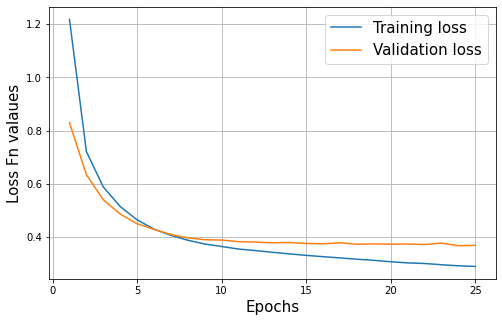

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), h.history['loss'], label='Training loss')
plt.plot(list(range(1,26)), h.history['val_loss'], label='Validation loss')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Fn valaues', fontsize=15)

Text(0, 0.5, 'Accuracy')

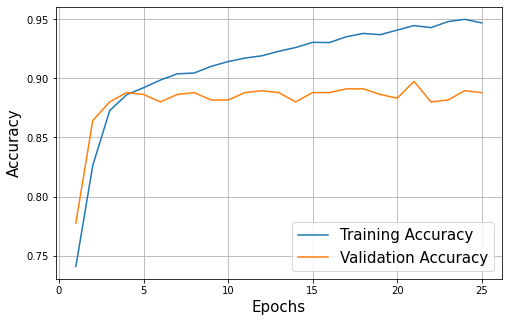

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), h.history['accuracy'], label='Training Accuracy')
plt.plot(list(range(1,26)), h.history['val_accuracy'], label='Validation Accuracy')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

In [56]:
# Evaluate the model on the test set
loss, acc = model.evaluate(Xtest, ytest, verbose=0)

# Print the test accuracy rounded to two decimal places using string formatting
print('Test Accuracy: {:.2f} %'.format(acc * 100))


Test Accuracy: 88.38 %


In [57]:
# Train Accuracy = 93.81